In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("zomato_data.csv")
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         148 non-null    object
 1   online_order                 148 non-null    object
 2   book_table                   148 non-null    object
 3   rate                         148 non-null    object
 4   votes                        148 non-null    int64 
 5   approx_cost(for two people)  148 non-null    int64 
 6   listed_in(type)              148 non-null    object
dtypes: int64(2), object(5)
memory usage: 8.2+ KB


In [13]:
df.rate = df['rate'].astype(str).str.split('/').str[0].astype(float)

In [14]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


Text(0.5, 0, 'Types of Restaurants')

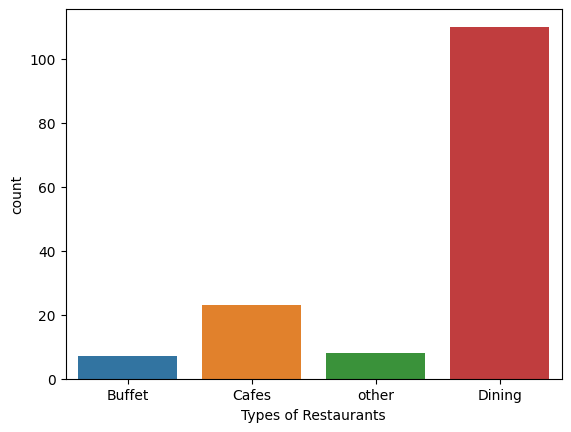

In [18]:
sns.countplot(x=df['listed_in(type)'], hue=df['listed_in(type)'])
plt.xlabel("Types of Restaurants")

Text(0, 0.5, 'Number of peoples like the type')

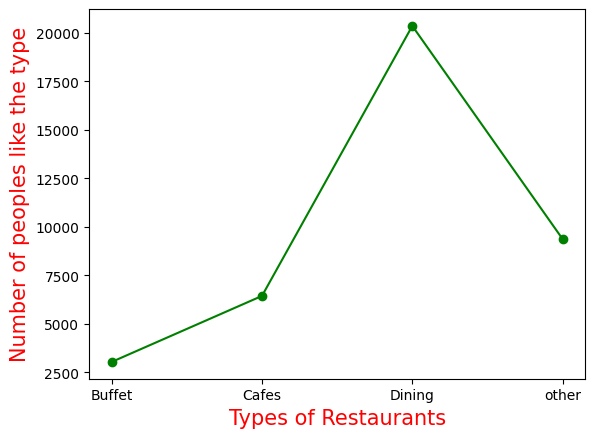

In [25]:
result = df.groupby('listed_in(type)')['votes'].sum()
plt.plot(result, c="green", marker='o')
plt.xlabel("Types of Restaurants", c="red", size=15)
plt.ylabel("Number of peoples like the type", c="red", size=15)

In [32]:
max_votes = df.votes.max()
r_name = df.query('votes == @max_votes')['name'].to_list()
print("Restaurant with maximum votes-", r_name[0])

Restaurant with maximum votes- Empire Restaurant


Text(0.5, 0, 'Accept online orders?')

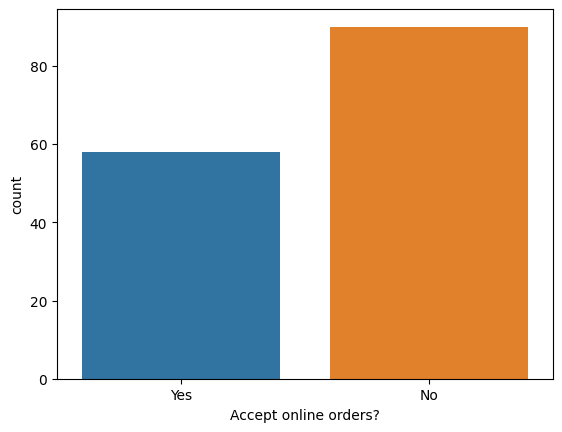

In [36]:
sns.countplot(x=df['online_order'], hue=df['online_order'])
plt.xlabel("Accept online orders?")

Text(0.5, 1.0, 'Rating distribution')

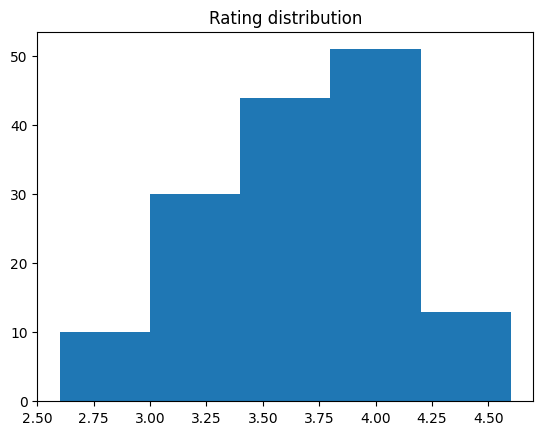

In [41]:
plt.hist(df['rate'], bins=5)
plt.title("Rating distribution")

Text(0, 0.5, 'How many people prefer average cost for 2 peoples')

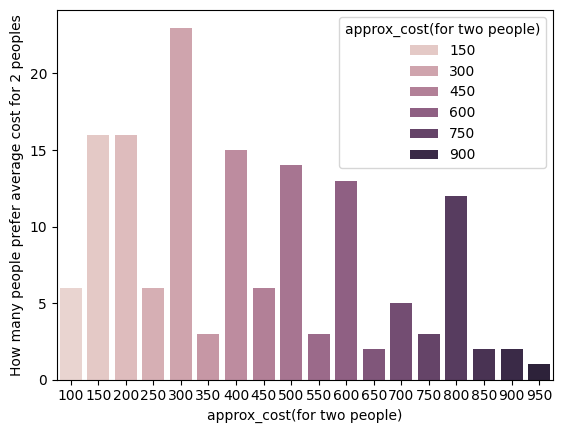

In [45]:
sns.countplot(x=df['approx_cost(for two people)'], hue=df['approx_cost(for two people)'])
plt.ylabel("How many people prefer average cost for 2 peoples")

Text(0, 0.5, 'Ratings')

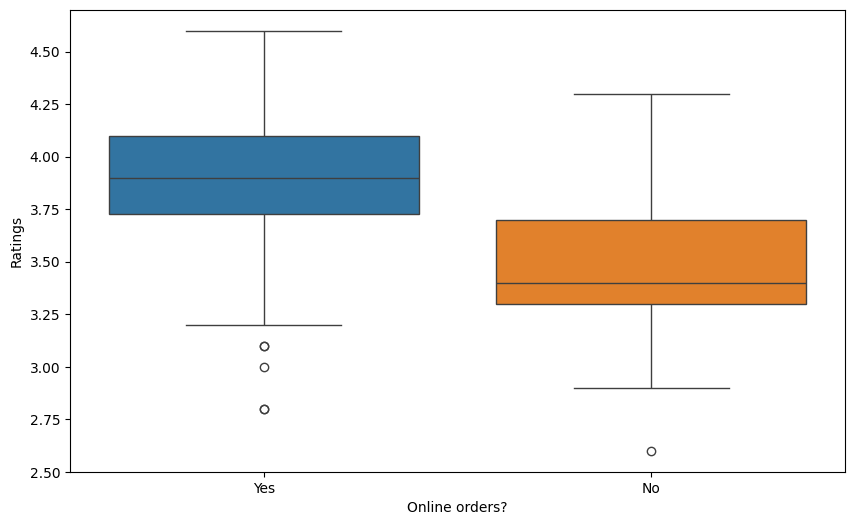

In [51]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='online_order', y='rate', hue='online_order')
plt.xlabel("Online orders?")
plt.ylabel("Ratings")

Text(50.722222222222214, 0.5, 'Listed In (Type)')

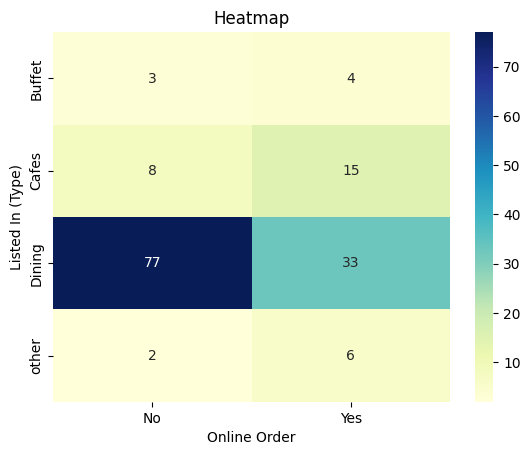

In [55]:
pivot_table = df.pivot_table(index="listed_in(type)", columns="online_order", aggfunc="size", fill_value=0)
sns.heatmap(pivot_table, annot=True, cmap='YlGnBu', fmt='d')
plt.title("Heatmap")
plt.xlabel("Online Order")
plt.ylabel("Listed In (Type)")